In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-statlog/Heart_disease_statlog.csv


In [12]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-statlog/Heart_disease_statlog.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       270 non-null    int64  
 1   sex       270 non-null    int64  
 2   cp        270 non-null    int64  
 3   trestbps  270 non-null    int64  
 4   chol      270 non-null    int64  
 5   fbs       270 non-null    int64  
 6   restecg   270 non-null    int64  
 7   thalach   270 non-null    int64  
 8   exang     270 non-null    int64  
 9   oldpeak   270 non-null    float64
 10  slope     270 non-null    int64  
 11  ca        270 non-null    int64  
 12  thal      270 non-null    int64  
 13  target    270 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 29.7 KB


In [19]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


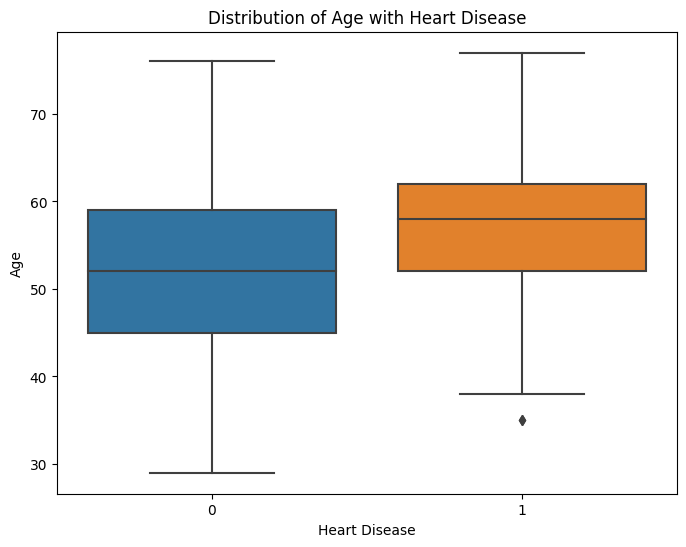

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(x='target', y='age', data=df)
plt.title("Distribution of Age with Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Age")
plt.show()

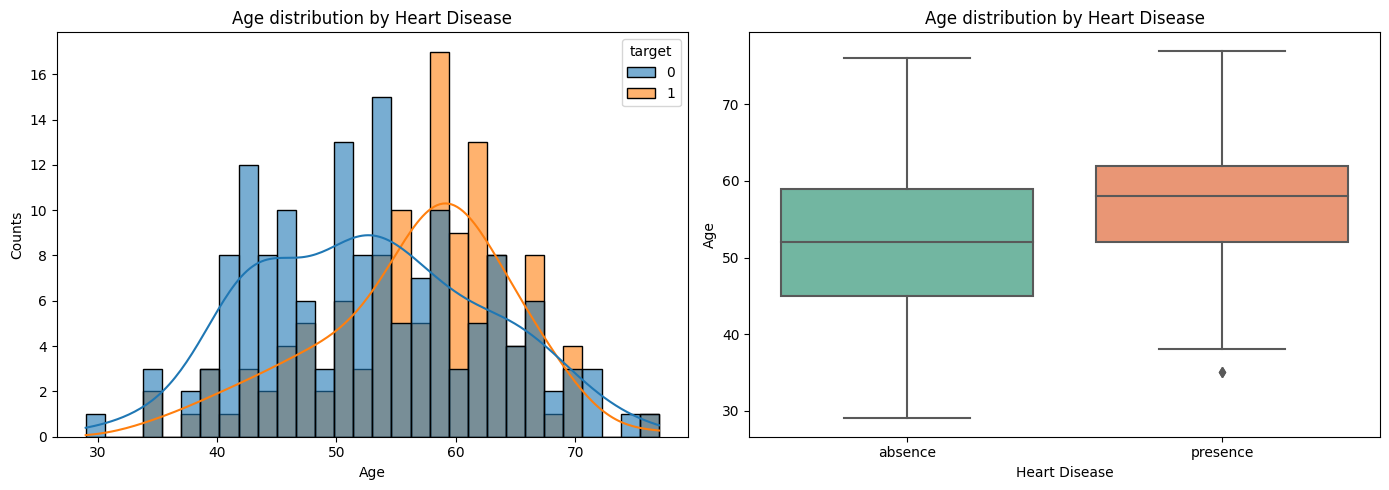

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.histplot(data=df, x="age", hue="target", kde=True, bins=30, alpha=0.6, ax=axes[0])
axes[0].set_title("Age distribution by Heart Disease")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Counts")

sns.boxplot(data=df, x="target", y="age", palette="Set2", ax=axes[1])
axes[1].set_title("Age distribution by Heart Disease")
axes[1].set_xlabel("Heart Disease")
axes[1].set_xticklabels(["absence", "presence"])
axes[1].set_ylabel("Age")

plt.tight_layout()
plt.show()

In [20]:
y = df['target']
X = df.drop('target', axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
import xgboost as xgb

xg = xgb.XGBClassifier()

# Fit model
model = xg.fit(X_train_scaled, y_train)

# Predict outputs
predictions = model.predict(X_test_scaled)
predictions

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [26]:
model.score(X_test_scaled, y_test)

0.8148148148148148

In [29]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(xg, X_train_scaled, y_train, cv=5) 

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

Cross-Validation Scores: [0.75       0.79069767 0.76744186 0.79069767 0.72093023]
Mean CV Accuracy: 0.7640


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

# Fit model
model_rf = rf.fit(X_train_scaled, y_train)

# Predict outputs
predictions_rf = model_rf.predict(X_test_scaled)
predictions_rf

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [27]:
model_rf.score(X_test_scaled, y_test)

0.8703703703703703

In [30]:
cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5) 
print(f"Cross-Validation Scores: {cv_scores_rf}")
print(f"Mean CV Accuracy: {cv_scores_rf.mean():.4f}")


Cross-Validation Scores: [0.72727273 0.81395349 0.88372093 0.81395349 0.76744186]
Mean CV Accuracy: 0.8013


In [32]:
pred_df = pd.DataFrame({
    'actual': y_test.values,
    'XGB_Prediction': predictions,
    'RF_Prediction': predictions_rf
})

pred_df.to_csv('predictions.csv', index=False)